In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import talib

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from math import sqrt
from matplotlib import pyplot
from numpy import array
import numpy as np
from keras.layers import LSTM , CuDNNLSTM
import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *  
sns.set()
from talib import abstract



C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  del sys.path[0]


In [30]:
# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

         Date       Open       High        Low      Close  Adj Close  \
0  2007-01-02  55.521000  57.466499  55.371399  56.867901  38.202568   
1  2007-01-03  57.167198  58.813400  57.017502  57.840599  38.856010   
2  2007-01-04  57.765800  57.990299  57.092400  57.765800  38.805763   
3  2007-01-05  57.616100  57.691002  56.792999  56.792999  38.152256   
4  2007-01-08  56.119598  56.119598  55.146900  55.296501  37.146938   

       Volume  
0  27682832.0  
1  38041509.0  
2  27239137.0  
3  24146636.0  
4  30340993.0  


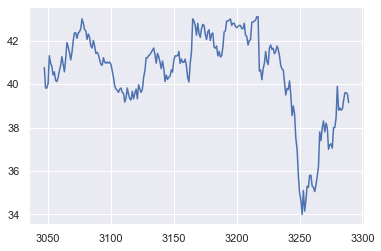

In [31]:
df = pd.read_csv('input/2882.TW.csv')
print(df.head())
series = df.dropna(axis=0,how='any')
series = series['Close']
plt.plot(series[-243:])

In [32]:
df = df.dropna()
df = df.rename(columns={"Date": "date", "Open": "open", "High": "high", "Low": "low", "Close": "close", "Adj Close": "adj Close",
                        "Volume": "volume"})
#df = df.drop(['date', 'adj Close'], axis=1)

In [33]:
ta_list = talib.get_functions()

# 迴圈執行，看看結果吧！
for x in ta_list:
    try:
        # x 為技術指標的代碼，透過迴圈填入，再透過 eval 計算出 output
        output = eval('abstract.'+x+'(df)')
        # 如果輸出是一維資料，幫這個指標取名為 x 本身；多維資料則不需命名
        output.name = x.lower() if type(output) == pd.core.series.Series else None
        # 透過 merge 把輸出結果併入 df DataFrame
        df = pd.merge(df, pd.DataFrame(output), left_on = df.index, right_on = output.index)
        df = df.set_index('key_0')
    except:
        print(x)

MAVP


In [34]:
df = df.drop(['date', 'adj Close'], axis=1)
df.head()

,open,high,low,close,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,linearreg_slope,stddev,tsf,var,atr,natr,trange,ad,adosc,obv
key_0,,,,,,,,,,,,,,,,,,,,,
0,55.521000,57.466499,55.371399,56.867901,27682832.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.186412e+07,NaN,27682832.0
1,57.167198,58.813400,57.017502,57.840599,38041509.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.945499,8.693027e+06,NaN,65724341.0
2,57.765800,57.990299,57.092400,57.765800,27239137.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.897899,2.231112e+07,NaN,38485204.0
3,57.616100,57.691002,56.792999,56.792999,24146636.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.972801,-1.835512e+06,NaN,14338568.0
4,56.119598,56.119598,55.146900,55.296501,30340993.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.918391,NaN,0.843442,NaN,NaN,1.646099,-2.284361e+07,NaN,-16002425.0


In [37]:
df = df.drop(['acos', 'asin'], axis=1)

In [38]:
df = df.dropna()

In [39]:
print(len(df.columns))

177


In [41]:
cols = ['close']  + [col for col in df if col != 'close']
df = df[cols]
df

,close,open,high,low,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,linearreg_slope,stddev,tsf,var,atr,natr,trange,ad,adosc,obv
key_0,,,,,,,,,,,,,,,,,,,,,
88,53.126598,52.827301,53.500702,52.303501,18869070.0,14.738178,249.719363,-0.571632,0.131244,-0.938006,...,0.034044,0.226959,53.376572,0.051510,1.049726,1.975896,1.197201,-1.924823e+08,-1.154568e+07,9.867138e+07
89,53.051800,53.051800,53.500702,52.752399,12259082.0,14.773288,268.263490,-0.416688,0.209047,-0.999541,...,-0.066437,0.214795,52.831414,0.046137,1.028196,1.938099,0.748303,-1.949315e+08,-1.019757e+07,8.641230e+07
90,54.099300,53.500702,54.174099,53.425900,26329028.0,14.770787,290.092182,-0.353590,0.454140,-0.939141,...,-0.088146,0.488140,52.818248,0.238280,1.034918,1.912997,1.122299,-1.738668e+08,-2.016620e+06,1.127413e+08
91,53.949699,54.099300,54.323799,53.799999,12844439.0,14.747083,27.149310,-0.041047,0.260862,0.456311,...,-0.037001,0.568673,53.153735,0.323389,0.998409,1.850630,0.523800,-1.793695e+08,-2.373835e+05,9.989688e+07
92,52.902100,53.575500,53.575500,52.528000,17892139.0,14.728134,64.599030,-0.206071,0.111983,0.903328,...,-0.012827,0.496333,53.212109,0.246346,1.028644,1.944430,1.421699,-1.844818e+08,-1.114569e+06,8.200474e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,39.250000,39.250000,39.500000,39.049999,11447894.0,19.710384,154.649448,1.814150,0.241700,0.428155,...,0.170220,0.169116,39.523077,0.028600,0.759094,1.933998,0.650002,1.408137e+10,5.124562e+06,9.669979e+10
3286,39.599998,39.500000,39.900002,39.500000,14051677.0,19.028121,154.264077,1.361271,-1.829408,0.434224,...,0.200769,0.304302,39.866483,0.092600,0.751302,1.897227,0.650002,1.407434e+10,1.143105e+06,9.671385e+10
3287,39.599998,39.400002,39.700001,39.299999,12594120.0,18.344453,168.946908,0.366481,-1.494815,0.191719,...,0.191319,0.347275,39.981317,0.120600,0.726209,1.833861,0.400002,1.408064e+10,1.413969e+06,9.671385e+10


In [42]:
# configure
n_lag = 60
n_seq = 7
pred_steps = n_seq
n_test = 192
n_epochs =1500
n_batch = 32
n_neurons = 32
features = 177

In [43]:
seq2seq_raw_values = df.values
seq2seq_raw_values = seq2seq_raw_values[:].reshape(len(seq2seq_raw_values),177)
test_value = seq2seq_raw_values[:,0].reshape(len(seq2seq_raw_values),1)
# rescale values to -1, 1
scaler_trans = MinMaxScaler(feature_range=(-1, 1))
transfor_fun = scaler_trans.fit_transform(test_value)
# rescale values to -1, 1
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_values = scaler.fit_transform(seq2seq_raw_values)
########################
#scaled_values = seq2seq_raw_values
#print(scaled_values[:27])
# transform into supervised learning problem X, y
supervised = series_to_supervised(scaled_values, n_lag, n_seq)
supervised_values = supervised.values
supervised_values.shape
train, test = supervised_values[:-243*1], supervised_values[-243*1:]

print('train',train.shape)
print('test',test.shape)

train (2888, 11859)
test (243, 11859)


In [44]:
encoder_input_data , decoder_target_data = train[: ,:(n_lag+n_seq-1)*features] , train[:,n_lag*features:]
decoder_target_data = decoder_target_data[: , ::features]
encoder_input_data = encoder_input_data.reshape((encoder_input_data.shape[0],(n_lag+n_seq-1),features))
decoder_target_data = decoder_target_data.reshape((decoder_target_data.shape[0],decoder_target_data.shape[1],1))
print("encoder_input_data",encoder_input_data.shape,"decoder_target_data",decoder_target_data.shape)

encoder_input_data (2888, 66, 177) decoder_target_data (2888, 7, 1)


In [45]:
print('encoder_input_data[-1]', encoder_input_data[0][-1][0])
print('decoder_target_data[-1]', decoder_target_data[0])

encoder_input_data[-1] 0.4368881003572589
decoder_target_data[-1] [[0.42230086]
 [0.32309912]
 [0.30850786]
 [0.4514753 ]
 [0.39020592]
 [0.4368881 ]
 [0.4806538 ]]


In [88]:
df_2882 = pd.read_csv('input/2882.TW.csv')
df_2330 = pd.read_csv('input/2330.TW.csv')


統計分析包括
 - 描述統計(Descriptive Statistics)
 - 推論統計(Inferential Statistics)

對於某一特定事物，其所有可能發生的結果形成的集合，稱之為母體(population)
而其中一部份可觀察到的結果則形成樣本(Sample)
 - 像是全校學生的身高是母體
 - 抽取的學生身高數據則是樣本

數據類型
 - 定性數據
   - 是對事務性質進行描述的數據
 - 定量數據 
   - 是呈現事物數量特徵的數據，是由不同數字組成的

每日收益率計算

In [100]:
daily_close_2882 = df_2882[['Adj Close']]
daily_close_2330 = df_2330[['Adj Close']]

#计算每日收益率
daily_pct_change_2882 = daily_close_2882.pct_change()*100
daily_pct_change_2330 = daily_close_2330.pct_change()*100

#用0填补缺失值NA
daily_pct_change_2882 = daily_pct_change_2882.dropna()
daily_pct_change_2330 = daily_pct_change_2330.dropna()

#查看每日收益率的前几行
print('daily_pct_change_2882', daily_pct_change_2882.head())
print('daily_pct_change_2330', daily_pct_change_2330.head())

daily_pct_change_2882    Adj Close
1   1.710466
2  -0.129316
3  -1.684046
4  -2.635016
5   1.217990
daily_pct_change_2330    Adj Close
1   0.443057
2  -0.441103
3  -1.181715
4  -1.644225
5   0.303916


计算收益率的另一种办法：
 rt = (Pt / Pt-1) - 1
代码示例



In [101]:
# 每日收益率
daily_pct_change_2882 = (daily_close_2882 / daily_close_2882.shift(1) - 1 )*100
daily_pct_change_2882 = daily_pct_change_2882.dropna()
print(daily_pct_change_2882.head())

   Adj Close
1   1.710466
2  -0.129316
3  -1.684046
4  -2.635016
5   1.217990


In [102]:
print('2882')
print(daily_pct_change_2882.describe())
print('2330')
print(daily_pct_change_2330.describe())

2882
         Adj Close
count  3279.000000
mean      0.018863
std       1.899408
min     -11.336982
25%      -0.893929
50%       0.000000
75%       0.870463
max      10.120332
2330
         Adj Close
count  3289.000000
mean      0.075205
std       1.681980
min      -7.915561
25%      -0.857136
50%       0.000000
75%       0.951256
max       8.870968


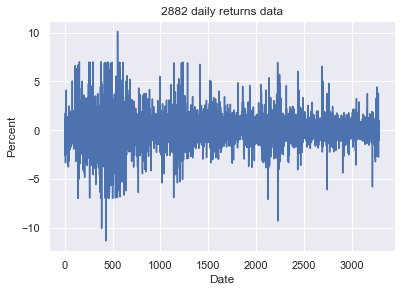

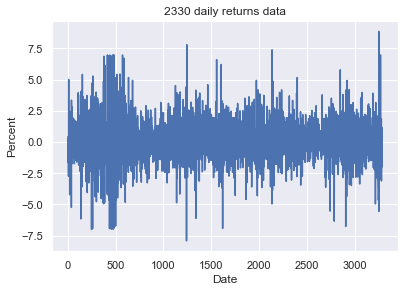

In [103]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(daily_pct_change_2882)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("2882 daily returns data")
plt.show()

fig = plt.figure()
ax2 = fig.add_axes([0.1,0.1,0.8,0.8])
ax2.plot(daily_pct_change_2330)
ax2.set_xlabel("Date")
ax2.set_ylabel("Percent")
ax2.set_title("2330 daily returns data")
plt.show()

數據的離散度
 - 也稱為數據的變異度，主要衡量樣本數據相對於中心位置的偏離程度。
   1. 全距
   2. 平均絕對標準差
   3. 變異數
   4. 標準差

在金融市場中，收益率的離散度經常被用作風險的度量指標。


In [104]:
print('Range', daily_pct_change_2330.max() - daily_pct_change_2330.min(),
     'MAD', daily_pct_change_2330.mad(),
     'var', daily_pct_change_2330.var(),
     'std', daily_pct_change_2330.std())

Range Adj Close    16.786529
dtype: float64 MAD Adj Close    1.219328
dtype: float64 var Adj Close    2.829057
dtype: float64 std Adj Close    1.68198
dtype: float64


In [105]:
print('Range', daily_pct_change_2882.max() - daily_pct_change_2882.min(),
     'MAD', daily_pct_change_2882.mad(),
     'var', daily_pct_change_2882.var(),
     'std', daily_pct_change_2882.std())

Range Adj Close    21.457314
dtype: float64 MAD Adj Close    1.299843
dtype: float64 var Adj Close    3.607752
dtype: float64 std Adj Close    1.899408
dtype: float64


 - 由上可以比較得出 國泰金股票比台積電股票變動率較大，風險較高。

概率密度函數和累積分布函數都是用來刻劃隨機變數的不確定性，描述的是母體的特徵

In [107]:
daily_pct_change_2882

,Adj Close
1,1.710466
2,-0.129316
3,-1.684046
4,-2.635016
5,1.217990
...,...
3285,1.029606
3286,0.891715
3287,0.000000
3288,-0.126260


In [106]:
from scipy import stats
density = stats.kde.gaussian_kde(daily_pct_change_2882)
bins = np.arange(-5, 5, 0.02)
plt.subplot(211)
plt.plot(bins, density(bins))
plt.title('2882 收益率序列的概率密度曲線圖')
plt.subplot(212)
plt.plot(bins, density(bins).cumsum())
plt.title('2882 收益率序列的累積分布函數圖')

C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\scipy\stats\kde.py:576: RuntimeWarning: Degrees of freedom <= 0 for slice
  aweights=self.weights))
C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


ValueError: array must not contain infs or NaNs